# k-Nearest Neighbors (KNN) algorithm

* KNN algorithm can be used for both classification and regression problems, we talk about KNN classification algorithm first.

## What is it

* Given a set of labeled data and a new data sample without label, find *k* pieces of data in the labeled dataset that are nearest to the new data point. The take a majority vote from the *k* labels which is the predicted label of the new data sample.

#### Input
1. a labeled dataset ***A***
2. a unlabeled data sample ***x***
3. value ***k***

#### Output
1. the majority label from the ***k*** samples that are nearest to ***x***

## How does it work

* Given a dataset ***A*** with ***n*** samples and ***m*** features (***A*** has shape ***n***\****m***) and a new sample ***x***, we calculate the distance (e.g. Euclidian distance). Find the ***k*** nearest neighbors to ***x*** and use the majority label as label for ***x***.

In [4]:
import numpy as np
from typing import List

def knn(x: np.array,
        dataset_x: np.array,
        dataset_y: List[int],
        k: int) -> int:
    '''
    knn classification algorithm
    
    :param np.array x: data sample to label, shape (1, m), m is number of features
    :param np.array dataset_x: dataset A, shape (n, m), n is number of samples
    :param List[int] dataset_y: labels from A, a list of length n
    :param int k: value k, defines the number of nearest neighbors to find
    :return: label of x
    '''
    num_samples = dataset_x.shape[0]
    # calculate euclidian distance in matrix form
    # 1. first calculate the difference
    # np.repeat(x, num_samples, axis=0) will repeat x in num_samples rows
    diffs = np.repeat(x, num_samples, axis=0) - dataset_x
    # 2. calculate square difference
    square_diffs = diffs ** 2
    # 3. sum up square difference per sample
    square_distances = square_diffs.sum(axis=1)
    # 4, take the square root which is euclidian distance
    distances = square_distances ** 0.5
    
    # sort distance from small to large
    sorted_index = distances.argsort()
    label_votes = {}
    for i in range(k):
        label = dataset_y[sorted_index[i]]
        label_votes[label] = label_votes.get(label, 0) + 1
    sorted_label_votes = [k for k, v in sorted(label_votes.items(),
                                               key=lambda item: item[1])]
    return sorted_label_votes[0]

## Simple example

In [5]:
def create_toy_dataset():
    """
    create a toy dataset
    """
    dataset = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return dataset, labels

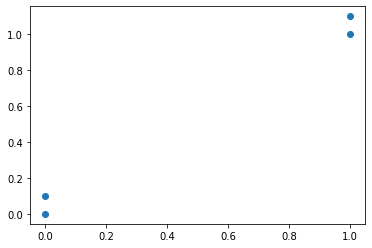

In [6]:
import matplotlib.pyplot as plt

dataset, labels = create_toy_dataset()
'''
dataset
array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])
       
labels
['A', 'A', 'B', 'B']
'''
# convert string labels to integer
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
dataset_y = le.fit_transform(labels)

# data visulization
fig = plt.scatter(dataset[:, 0], dataset[:, 1])

In [7]:
# classify data point [0.1, 0.1]
label = knn(np.array([[0.1, 0.1]]), dataset, dataset_y, 3)
print(le.inverse_transform([label]))

['A']


## Practical example

digits classification

(1797, 64)


<Figure size 432x288 with 0 Axes>

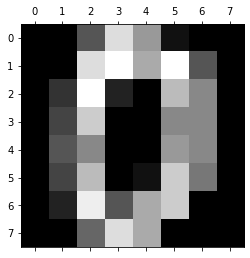

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [23]:
dataset_x = digits.data[:-5]  # (1792, 64)
dataset_y = digits.target[:-5]  # (1792, )
test_x = digits.data[-5:]  #  (5, 64)
test_y = digits.target[-5:]  #  (5, )

In [34]:
for i, x in enumerate(test_x):
    pred = knn([x], dataset_x, dataset_y, 3)
    print('groud truth: %d, prediction: %d' % (test_y[i], pred))

groud truth: 9, prediction: 9
groud truth: 0, prediction: 0
groud truth: 8, prediction: 8
groud truth: 9, prediction: 9
groud truth: 8, prediction: 8


In [35]:
# compare with sklearn knn
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dataset_x, dataset_y)

for i, x in enumerate(test_x):
    pred = neigh.predict([x])
    print('groud truth: %d, prediction: %d' % (test_y[i], pred))

groud truth: 9, prediction: 9
groud truth: 0, prediction: 0
groud truth: 8, prediction: 8
groud truth: 9, prediction: 9
groud truth: 8, prediction: 8
